In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import Analyzer

In [11]:
mk = Analyzer.MarketDB()
raw_df = mk.get_daily_price("삼성전자", "2018-05-04", "2021-06-21")

In [12]:
print(raw_df)

              code        date   open   high    low  close  diff    volume
date                                                                      
2018-05-04  005930  2018-05-04  53000  53900  51800  51900  1100  39565391
2018-05-08  005930  2018-05-08  52600  53200  51900  52600   700  23104720
2018-05-09  005930  2018-05-09  52600  52800  50900  50900  1700  16128305
2018-05-10  005930  2018-05-10  51700  51700  50600  51600   700  13905263
2018-05-11  005930  2018-05-11  52000  52200  51200  51300   300  10314997
...            ...         ...    ...    ...    ...    ...   ...       ...
2021-06-14  005930  2021-06-14  80800  80900  80500  80500   500  10550078
2021-06-15  005930  2021-06-15  80900  81200  80600  80900   400  10075685
2021-06-16  005930  2021-06-16  81500  81900  81100  81800   900  14999855
2021-06-17  005930  2021-06-17  81100  81300  80700  80900   900  14007385
2021-06-18  005930  2021-06-18  81100  81100  80500  80500   400  14618173

[769 rows x 8 columns]


In [22]:
def MinMaxScaler(data):
    """최소값과 최대값을 이용하면 0~1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값 (1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['open', 'high', 'low', 'volume', 'close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['close']]

print(dfx.info())
print(dfy.info())


x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []

window_size = 10
data_size = 5

for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가 (i + window_size)는 포함되지 않음
    _y = y[i + window_size] # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y)*0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences = True, input_shape=(window_size, data_size))) 
# unit은 노드 input_shape(???) 
model.add(Dropout(0,1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss="mean_squared_error")
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

# visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 2018-05-04 to 2021-06-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    769 non-null    float64
 1   high    769 non-null    float64
 2   low     769 non-null    float64
 3   volume  769 non-null    float64
 4   close   769 non-null    float64
dtypes: float64(5)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 2018-05-04 to 2021-06-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   769 non-null    float64
dtypes: float64(1)
memory usage: 12.0+ KB
None
[[0.8561967833474812, 0.7618243243230375, 0.8480531813849039, 0.1595551162108396, 0.8356676003719222], [0.8561967833474812, 0.7635135135122237, 0.8499525166175689, 0.14074174415107585, 0.8300653594755741], [0.8486281929974482, 0.7601351351338511, 0.8537511870828989, 0.097493940778289, 0.8300653594755741],

TypeError: in user code:

    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\engine\sequential.py:380 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\engine\functional.py:421 call
        inputs, training=training, mask=mask)
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\engine\functional.py:556 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\layers\core.py:231 call
        lambda: array_ops.identity(inputs))
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\utils\control_flow_util.py:110 smart_cond
        pred, true_fn=true_fn, false_fn=false_fn, name=name)
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\framework\smart_cond.py:54 smart_cond
        return true_fn()
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\layers\core.py:226 dropped_inputs
        noise_shape=self._get_noise_shape(inputs),
    C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\layers\core.py:215 _get_noise_shape
        for i, value in enumerate(self.noise_shape):

    TypeError: 'int' object is not iterable


[[0.8561967833474812, 0.7618243243230375, 0.8480531813849039, 0.1595551162108396, 0.8356676003719222], [0.8561967833474812, 0.7635135135122237, 0.8499525166175689, 0.14074174415107585, 0.8300653594755741], [0.8486281929974482, 0.7601351351338511, 0.8537511870828989, 0.097493940778289, 0.8300653594755741], [0.8334910122973822, 0.7499999999987331, 0.8404558404542442, 0.12226234319987753, 0.8151260504186458], [0.8297067171223658, 0.7398648648636151, 0.8366571699889143, 0.15344025981201348, 0.8132586367865299], [0.8278145695348574, 0.7449324324311741, 0.8328584995235843, 0.11270629683386574, 0.8132586367865299], [0.8202459791848244, 0.7314189189176834, 0.8290598290582544, 0.07152005026889159, 0.8039215686259498], [0.8221381267723328, 0.7364864864852424, 0.8309591642909193, 0.06599740818489512, 0.8113912231544138], [0.8334910122973822, 0.7483108108095468, 0.8404558404542442, 0.12332209145541749, 0.8281979458434581], [0.8259224219473492, 0.7381756756744288, 0.8328584995235843, 0.111768260372

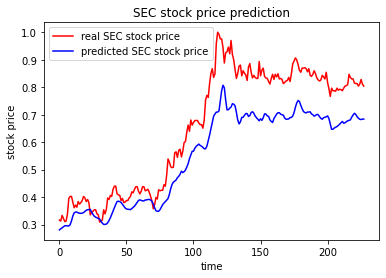

Tomorrow's SEC price : [68479.25370145] KRW


In [21]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['open','high','low','volume', 'close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['close']]

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df.close[-1] * pred_y[-1] / dfy.close[-1], 'KRW')



In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
max_features = 10000
maxlen = 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


x_train[0]

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [38]:
len(x_train[2])

141

In [39]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding="post") # [0, 0, 0, 3, 5, 7]
x_test = pad_sequences(x_test, maxlen=maxlen, padding="post")

In [40]:
x_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32])

In [41]:
x_train.shape

(25000, 100)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, SimpleRNN

SimpleRNN

In [43]:
model = Sequential()
model.add(Embedding(max_features, 32)) # 토큰을 벡터화 시키고 2차원이 3차원이 된다. (축소시키는 작업) 
model.add(SimpleRNN(32)) # GRU, LSTM, SimpleRNN 등으로 바꿔도 됨!
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 5s 26ms/step - loss: 0.6615 - acc: 0.5879 - val_loss: 0.5779 - val_acc: 0.7038
Epoch 2/10
157/157 [==============================] - 4s 25ms/step - loss: 0.4214 - acc: 0.8173 - val_loss: 0.5496 - val_acc: 0.7736
Epoch 3/10
157/157 [==============================] - 4s 25ms/step - loss: 0.3034 - acc: 0.8771 - val_loss: 0.3796 - val_acc: 0.8336
Epoch 4/10
157/157 [==============================] - 4s 24ms/step - loss: 0.2277 - acc: 0.9136 - val_loss: 0.4296 - val_acc: 0.8090
Epoch 5/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1597 - acc: 0.9439 - val_loss: 0.4227 - val_acc: 0.8232
Epoch 6/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1023 - acc: 0.9664 - val_loss: 0.5050 - val_acc: 0.8196
Epoch 7/10
157/157 [==============================] - 4s 25ms/step - loss: 0.0676 - acc: 0.9785 - val_loss: 0.6703 - val_acc: 0.7362
Epoch 8/10
157/157 [==============================] - 4s 25ms/step - 

LSTM

In [44]:
model = Sequential()
model.add(Embedding(max_features + 1, 32, input_length=maxlen)) # 토큰을 벡터화 시키고 2차원이 3차원이 된다. (축소시키는 작업) 
model.add(LSTM(32)) # GRU, LSTM, SimpleRNN 등으로 바꿔도 됨!
# model.add(LSTM(32, return_sequences=True)) # return_sequences=True 하면 중간에 출력이 되는것
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           320032    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,385
Trainable params: 328,385
Non-trainable params: 0
_________________________________________________________________


- output에서 None 부분은 row / 100은 feature값을 말하며(세로), 32는 32로 차원 축소했다는 뜻 (가로)
- param은 feature와 32의 곱 

In [45]:
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 15s 23ms/step - loss: 0.4449 - acc: 0.7887 - val_loss: 0.3787 - val_acc: 0.8370
Epoch 2/10
625/625 [==============================] - 14s 23ms/step - loss: 0.2990 - acc: 0.8787 - val_loss: 0.3318 - val_acc: 0.8556
Epoch 3/10
625/625 [==============================] - 14s 23ms/step - loss: 0.2612 - acc: 0.8974 - val_loss: 0.3609 - val_acc: 0.8522
Epoch 4/10
625/625 [==============================] - 15s 23ms/step - loss: 0.2425 - acc: 0.9062 - val_loss: 0.3270 - val_acc: 0.8592
Epoch 5/10
625/625 [==============================] - 14s 23ms/step - loss: 0.2254 - acc: 0.9135 - val_loss: 0.3704 - val_acc: 0.8500
Epoch 6/10
625/625 [==============================] - 15s 24ms/step - loss: 0.2134 - acc: 0.9183 - val_loss: 0.3779 - val_acc: 0.8522
Epoch 7/10
625/625 [==============================] - 15s 24ms/step - loss: 0.2025 - acc: 0.9233 - val_loss: 0.3623 - val_acc: 0.8484
Epoch 8/10
625/625 [==============================] - 15s 24ms